<h1 align='center'>
DECODING WORKSHOP
</h1>


# Introduction

## Jupyter notebook usage

This notebook allows to run python code interactively. Each code cell can be edited and run separately.

### Run a cell
Click on the following cell to select it and press the `Run` button or use the shortcut `Shitf+Enter`

In [1]:
# Click here and press Shift + Enter 
print('Hello World')

Hello World


### Variables scopes
All variables and functions of the notebooks are shared. Be careful not to override already existing variables by mistake!

In [2]:
# Here we declare a variable
tuto_string = 'Initial string'

In [3]:
# Let's print it
print(tuto_string)

Initial string


In [4]:
# Then we override it
tuto_string = 'Overriden string'
print('now run the previous cell again to print the string')

now run the previous cell again to print the string


**→ The order in which you run the cells matters**

## Python basics

Python is a free and open source programming language that aims at being readable and fast to program with.

A big strength of Python is its extensive standard library that provides convenient tools for usual tasks. It is also very easy to install or distribute modules with it. Many high quality modules have been created by the community, in particular we'll use a few targetting machine learning.

You can skip this part if you're already familiar with Python 👍

### Math operations

In [5]:
# declaring variables
a = 2
b = 3.5

In [6]:
# sum
a + b

5.5

In [7]:
# multiplication
a * b

7.0

In [8]:
# division
a / b

0.5714285714285714

In [9]:
# integer division
5 // 2

2

In [10]:
# power (5^2)
5 ** 2

25

### Lists

In [11]:
l = [1, 4.0, 5, 'hi', [0,1,2]]
print(l)

[1, 4.0, 5, 'hi', [0, 1, 2]]


In [12]:
# accessing the first element
l[0]

1

In [13]:
# accessing the last element
l[-1]

[0, 1, 2]

In [14]:
# you can access any element of a list in a list
l[-1][2]

2

In [15]:
# accessing a slice
l[1:4]

[4.0, 5, 'hi']

In [16]:
# many objects have a length that you can get with len()
len(l)

5

### For loops

In [17]:
fruits = ['apple', 'banana', 'orange']

for fruit in fruits:
    print(fruit)

apple
banana
orange


In [18]:
for i in range(4):
    print(i)

0
1
2
3


In [19]:
# let's find the fruit names with an 'a'

fruits = ['apple', 'banana', 'orange', 'kiwi']
has_an_a = []
   
for fruit in fruits:
    if 'a' in fruit:
        has_an_a.append(fruit) # we can add an element to a list with list.append(element)
   
print("List of fruits with an 'a':", has_an_a)


List of fruits with an 'a': ['apple', 'banana', 'orange']


### Comparisons

In [20]:
the_basket = ['apple', 'banana', 'lemon']

my_favorite = 'lemon'

for fruit in the_basket:
    if fruit == my_favorite:
        print(f"There's a {my_favorite} left in the basket!")
    else:
        print(f"I don't like {fruit}")



I don't like apple
I don't like banana
There's a lemon left in the basket!


In [21]:
5 < 4

False

In [22]:
'python' != 5.2

True

In [23]:
'True' == True

False

In [24]:
4 <= 4

True

### Functions

In [25]:
def addition(x,y):
    return x + y

res = addition(6,5)
print(res)

11


In [26]:
# parameters can be optional if they have a default value

def print_passion(name='trains'):
    print(f'I like {name}')
    
print_passion()
print_passion(name='knitting')

I like trains
I like knitting


In [27]:
# you can return multiple values

def stats(list_of_numbers):
    return max(list_of_numbers), min(list_of_numbers) # min and max functions are built-in

l = [3,6,1,8,12]

maximum, minimum = stats(l)

print(f'{maximum}, {minimum}')

12, 1


### Comprehensions

Due to it's nature, Python is rather slow for large for loops, in particular when adding elements to a list with append. 

It is common to use comprehensions instead for both conciseness and optimization:

In [28]:
square_numbers = [i**2 for i in range(10)]

print(square_numbers)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [29]:
# list comprehensions support conditions

fruits = ['apple', 'banana', 'orange', 'kiwi']

has_an_a = [fruit for fruit in fruits if 'a' in fruit]

print(has_an_a)

['apple', 'banana', 'orange']


# TODO: Import libraries

In [30]:
# Import packages

import numpy as np # library providing efficient array manipulation
import sklearn # machine learning tools
import scipy
import matplotlib.pyplot as plt # matlab-like plot library
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

from librosa.util import frame
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, balanced_accuracy_score, mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA

from pyriemann.estimation import Covariances, XdawnCovariances
from pyriemann.classification import MDM


from scipy.signal import iirdesign, sosfilt, convolve, wiener

import tp # load python module written for this project
from tp.utils import buffering_power

# Part 0 : Dataset

In this workshop, we'll decode finger flexion from ECoG recordings. The data includes the recordings of the flexion of the subjects 5 fingers.

More details here: https://www.bbci.de/competition/iv/desc_4.pdf

### Download dataset

Run the following cell to download the dataset. 

If it fails, please manually download and extract to `tp-decoding/data/bciciv/`:
1. the training data: https://www.bbci.de/competition/download/competition_iv/BCICIV_4_mat.zip
2. the evaluation data: https://www.bbci.de/competition/iv/results/ds4/true_labels.zip



In [31]:
dataset_path = 'data/bciciv'
if not tp.dataset_exists(dataset_path):
    tp.download_dataset(dataset_path)
else:
    print(f'dataset already exists in {dataset_path}') 


dataset already exists in data/bciciv


### Load dataset

In [32]:
dataset = tp.load_data(dataset_path)
fs = 1000 # sampling frequency of the dataset

### Explore dataset

In [33]:
for subject in dataset:
    print(len(subject.train_ecog))

400000
400000
400000


In [34]:
print(len(dataset))

3


In [35]:
subject_data = dataset[0] # first subject in dataset
print(subject_data.train_fingers)

[[-0.40011286  0.1732757   0.99956459 -0.06184273  0.41964019]
 [-0.40011286  0.1732757   0.99956459 -0.06184273  0.41964019]
 [-0.40011286  0.1732757   0.99956459 -0.06184273  0.41964019]
 ...
 [-0.61251224 -0.34792878 -0.21741923 -0.17560933 -0.07191979]
 [-0.61251224 -0.34792878 -0.21741923 -0.17560933 -0.07191979]
 [-0.61251224 -0.34792878 -0.21741923 -0.17560933 -0.07191979]]


In [36]:
# the data is stored in numpy arrays, you can get their size by accessing their 'shape' property

subject_data.train_fingers.shape

(400000, 5)

In [37]:
# get first sample for all fingers, indexing starts at 0 /!\

subject_data.train_fingers[0, :]

array([-0.40011286,  0.1732757 ,  0.99956459, -0.06184273,  0.41964019])

In [38]:
# get last sample for all fingers

subject_data.train_fingers[-1, :]

array([-0.61251224, -0.34792878, -0.21741923, -0.17560933, -0.07191979])

In [39]:
# get 100 samples from index 1200 to 1299 for the 5th finger

subject_data.train_fingers[1200:1300, 4]

array([0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964019,
       0.41964019, 0.41964019, 0.41964019, 0.41964019, 0.41964

### Plot the data with matplotlib
You can find the documentation for the `plot` function here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

For more information, you can check the [quick start guide](https://matplotlib.org/stable/users/explain/quick_start.html)

In this part, you will plot the movement of each finger over time. The position of the finger i at a time t is accessed by `subject_data.train_fingers[t, i]`. 

In [40]:
n_fingers = subject_data.train_fingers.shape[1]

fig = plt.figure(figsize=(50,20))
axes = fig.subplots(nrows=n_fingers, ncols=1, sharex=True)

for i in range(n_fingers):
    axes[i].plot(#####  WRITE HERE  ######)
    axes[i].set_ylabel(f'finger {i+1}')

_ = fig.suptitle('Finger trajectories (train set)')

# you can double clik on large plots to zoom in

SyntaxError: '(' was never closed (3127262236.py, line 7)

### Create discrete output 

In this part we will create true labels for the output in order to use it as classification labels. All the labels are already created, you can just plot the comparison between the finger position, the filtered position and the labels used as output for the test set. They are accessible for finger `i` at time `t` respectively with `subject_data.test_fingers[t, i]`, `test_fingers_filtered[t, i]` and `cue_test[t, i]`. Note that the frequency has been reduced by a frequency ratio of `f_ratio` between the base finger position and the other outputs.

In [ ]:
f_ratio = 40


(n_times_train, n_fingers) = subject_data.train_fingers.shape
n_channels = subject_data.train_ecog.shape[1]
n_times_train = n_times_train//f_ratio
threshold = 0.5
n_times_test = subject_data.test_fingers.shape[0]//f_ratio

win_size = 25
win = 1/win_size*np.ones([win_size, 1])
train_fingers_filtered = convolve(subject_data.train_fingers[::f_ratio], win, 'same')
train_fingers_filtered = np.concatenate((train_fingers_filtered, threshold*np.ones([n_times_train, 1])), axis=1)
y_train = np.argmax(train_fingers_filtered, axis=1)
cue_train = np.zeros([n_times_train, n_fingers+1])
for i in range(n_times_train):
    cue_train[i, y_train[i]] = 1

test_fingers_filtered = convolve(subject_data.test_fingers[::f_ratio], win, 'same')
test_fingers_filtered = np.concatenate((test_fingers_filtered, threshold*np.ones([n_times_test, 1])), axis=1)
y_test = np.argmax(test_fingers_filtered, axis=1)
cue_test = np.zeros([n_times_test, n_fingers+1])
for i in range(n_times_test):
    cue_test[i, y_test[i]] = 1

# Save the full data for future use
y_train_full = y_train
y_test_full = y_test

fig = plt.figure(figsize=(150,5))
ax = fig.subplots(3, 1, sharex=True)
for i in range(n_fingers):
    ax[0].plot(subject_data.train_fingers[::f_ratio, i])
    ax[1].plot(train_fingers_filtered[:, i])
    ax[2].plot(cue_train[:, i])
ax[1].plot([0, n_times_train], [threshold, threshold], color='k')
fig.suptitle('Finger trajectories (train set)')


fig = plt.figure(figsize=(150,5))
ax = fig.subplots(3, 1, sharex=True)
for i in range(n_fingers):
    ax[0].plot(### WRITE HERE ###)
    ax[1].plot(### WRITE HERE ###)
    ax[2].plot(### WRITE HERE ###)
ax[1].plot([0, n_times_test], [threshold, threshold], color='k')
_ = fig.suptitle('Finger trajectories (test set)')

# click on the figure to expand

# Part 1 : Dicrete decoding

In this part we will be interested in decoding finger mouvement during tapping from ECOG data and in order to do so we will focus on start with feature extraction by extracting time-frequency features on every electrodes using short term fourier transfrom. 

After this we will get a first set of results that we will visualize using different metrics such as the confusion matrix, the accuracy and the balanced accuracy. 

Then we will have an example of the usefullness of a validation set in the case of lagged responses. 

Once the lag have been set, we will see that we can also get better results using spatial filters such as PCA.

## 1.1 Feature extraction

### Temporal filtering and normalization

In this part we will focus on the normalization and the filtering of the data using firstly the `StandardScaler` from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) and secondly classical filtering function such as `iirdesign` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirdesign.html#scipy.signal.iirdesign) and `sosfilt` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sosfilt.html#scipy.signal.sosfilt) from `scipy.signal`. If you are more accustomed with other filtering method, you can also use them.  

In the sklearn API, all **transformer** classes are using the `fit` function to train the algorithm (set their necessary parameter to work) and the `transform` function to transform the data.

For the filtering part, you can start with a filter with a maximal gain loss of 2dB in the non filtered frequencies and minimal gain loss of 20dB in the filtered frequencies. For the `ws` argument, you can use `0.9*band[0]` and `1.1*band[1]` as stop band.

It is pretty common in ECOG to filter in several frequency bands and use all the resulting features for the decoding. Here we will use frequencies between 1 and 200Hz cutted as 1-10Hz, 10-30Hz, 30-50Hz and 70-200Hz. 

In [ ]:
ecog_train = subject_data.train_ecog
ecog_test = subject_data.test_ecog

scaler = StandardScaler()
train_ecog_normalized = scaler.fit_transform(ecog_train)
test_ecog_normalized = scaler.transform(ecog_test)


filters = []

bands = [(#, ##), (##, ##), (##, ##), (##, ###)]
n_filters = len(bands)

for i_band, band in enumerate(bands):
    filters.append(iirdesign(### WRITE HERE ###, analog=False, fs=fs, output='sos'))



train_ecog_filtered = []
test_ecog_filtered = []

for filt in filters:
    train_ecog_filtered.append(sosfilt(### WRITE HERE ###, axis=0))
    test_ecog_filtered.append(sosfilt(### WRITE HERE ###, axis=0))

fig = plt.figure(figsize=(50,15))
ax = fig.subplots(nrows=4, ncols=1)

ax[0].plot(train_ecog_filtered[0][:1000, 0])
ax[1].plot(train_ecog_filtered[1][:1000, 0])
ax[2].plot(train_ecog_filtered[2][:1000, 0])
ax[3].plot(train_ecog_filtered[3][:1000, 0])

ax[0].plot(train_ecog_normalized[:1000, 0])
ax[1].plot(train_ecog_normalized[:1000, 0])
ax[2].plot(train_ecog_normalized[:1000, 0])
ax[3].plot(train_ecog_normalized[:1000, 0])

fig.suptitle('Filtered data (train set)')

### Average power computation

Once the signal has been filtered, you can extract the average power of the signal in those frequency band using the `power` and `mean` function from `numpy`. Note that the formula for the average power of a centered signal $x$ is 

\begin{align}
P(x) = \frac{1}{N}\sum_{t}x^2(t),
\end{align}

with $N$ the number of elements in the window.  

In this part we will extract power in 1s of signal every 40ms. In order to compute the frame to be averaged you can use the fonction `frame` from `librosa.util`(https://librosa.org/doc/latest/generated/librosa.util.frame.html) and the padding function `pad` from `numpy` because for the first frames you can't take the 1s of previous signal as it doesn't exist, therefore you can replace it with zeros.  

For an easier buffering version, you can use `tp.buffering_power(X, win_size, f_ratio, n_buffer)` and take the power yourself or even easier `tp.buffering_power(X, win_size, f_ratio, n_buffer)` that already takes the power for you. They are functions that has been directly created for this hand on. We **highly** recommend this for people who don't want to waste time in this part, that can take some time and does not add much to the hand on. 

In [ ]:
win_size = 1000
hop = f_ratio
n_buffer = 1;

X_train_filtered = np.concatenate(train_ecog_filtered, axis=1)
X_train_buffer = tp.buffering(### WRITE HERE ###)
X_train = ### WRITE HERE ###
X_train_full = X_train

X_test_filtered = np.concatenate(test_ecog_filtered, axis=1)
X_ttest = ### WRITE HERE ###
X_test_buffer = tp.buffering(### WRITE HERE ###)
X_test_full = X_test

### Set if we use the idle or not

In order to make things easier you can chose to select only the fingers and not the idle task.

In [ ]:

use_idle_data = True
if not use_idle_data:
    X_train = X_train_full[y_train_full != 5]
    X_test = X_test_full[y_test_full != 5]
    y_train = y_train_full[y_train_full != 5]
    y_test = y_test_full[y_test_full != 5]
    n_times_train = y_train.shape[0]
    n_times_test = y_test.shape[0]
else:
    X_train = X_train_full
    X_test = X_test_full
    y_train = y_train_full
    y_test = y_test_full
    n_times_train = y_train.shape[0]
    n_times_test = y_test.shape[0]
    

In [ ]:
print(X_train.shape)
print(y_train.shape)

## 1.2 Classification

### The classifier

A classifier is an algorithm that aims to classify given inputs (here the power in given frequency bands) into outputs (here our 5 possible fingers + the idle class where the user does nothing). 

In this particular example we will use either the `LinearDiscriminantAnalysis` (imported here as `LDA`) from `sklearn.discriminant_analysis` or the `LinearSVC` from `sklearn.svm`. 
See their documentation here : 

https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

In this part we **higly** recommend to use the LDA classifier as it is way faster as compared to the SVC and it will be used several times in the follwing exercises.

In the sklearn API, all **classifier** classes are using the `fit` function to train the algorithm and the `predict` function to get the predictions for the test set. 

### Fit the classifier

In [ ]:
estimator = LDA()

estimator.fit(### WRITE HERE ###)

### Get the predicted labels

In [ ]:
y_pred = estimator.predict(### WRITE HERE ###)
y_proba = estimator.predict_proba(### WRITE HERE ###)

# Visualisation for nice plots
cue_pred = np.zeros([n_times_test, n_fingers+1])
for i in range(n_times_test):
    cue_pred[i, y_pred[i]] = 1

fig = plt.figure(figsize=(150,5))
ax = fig.subplots(3, 1)

cue_test = np.zeros([n_times_test, n_fingers+1])
for i in range(n_times_test):
    cue_test[i, y_test[i]] = 1

for i in range(n_fingers):
    ax[0].plot(cue_test[:, i])
    ax[1].plot(y_proba[:, i])
    ax[2].plot(cue_pred[:, i])
fig.suptitle('Finger trajectories (test set)')

## 1.3 Confusion matrix and metrics

Once you get your predictions you usually want to evaluate the performance of your decoder. In order to do so, a lot of different metrics have been developped with time. Most of the are using what is called a confusion matrix in order to be computed. 

### The confusion matrix

The confusion matrix represents how well our classifier is performing. The rows are the true labels we are expected to obtain and the columns are the labels our classifier actually gives us. 

In order to plot the confusion matrix, you can use the `from_predictions` function from the `ConfusionMatrixDisplay` class of `sklearn.metrics`.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

In [ ]:
fig = plt.figure(figsize=(100,100))
disp = ConfusionMatrixDisplay.from_predictions(### WRITE HERE ###)

### The accuracy

A good way to consider how well the classifer is performing using the confusion matrix is the accuracy. The accuracy is equal to the total number of well predicted labels divided by the total number of labels. In the confusion matrix it is equal to the sum of the diagonal divided by the sum of all the elements of the matrix. 

You can get the accuracy using the `accuracy_score` function from `sklearn.metrics`. 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

In [ ]:
acc = accuracy_score(### WRITE HERE ###)
print("Accuracy is {:.2f}%. Chance is at {:.2f}%".format(100*np.mean(acc), 100/np.unique(y_test).shape[0]))

### The balanced accuracy

In some cases there are more labels from some classes than others, for example here the finger 2 and 5 are less represented than others so their accuracy accounts for less than the others when we compute the accuracy metric. A good way to consider every labels with the same weight is to compute the balanced accuracy. It gives the accuracy for each class reweighted so that every class accounts for as much as the others. 

It is computed using the `balanced_accuracy_score` function from `sklearn.metrics`.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html#sklearn-metrics-balanced-accuracy-score

In [ ]:
for i in range(n_fingers+1):
    print("There are {} labels in test for class {}".format(np.sum(y_test==i), i+1))

plt.hist(y_test, bins=n_fingers+1, rwidth=0.5)


In [ ]:
acc = balanced_accuracy_score(### WRITE HERE ###)
print("Average score is {:.2f}%. Chance is at {:.2f}%".format(100*np.mean(acc), 100/np.unique(y_test).shape[0]))

## 1.4 The validation set

Sometimes algorithms and methods need to set a specific parameter to get better results. In order to do so, we usually use what we call a validation set. This set is usually a subdivision of the training set that works as a validation for the parameter we are trying to optimize. In the next example, we will try to find the best lag between the input and the output.

### Use the validation to compute a lag value

For this part you can use the `train_test_split` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function from sklearn to get the validation set by splitting the train set.

In this part we will take a lag value between -26 and 25 samples, wich corresponds to a lag between -1.04s and 0.96s between the input and the output. 

In [ ]:
lags = [i for i in range(-26, 26, 2)] 
X_train_val, X_val, y_train_val, y_val = train_test_split(### WRITE HERE ###, test_size=0.33, random_state=13, shuffle=False)
lagged_accuracies = []
n_times_train_val = X_train_val.shape[0]
n_times_val = X_val.shape[0]
for i_lag, lag in enumerate(lags):
    X_train_lagged = X_train_val[max(-lag, 0):min(n_times_train_val-lag, n_times_train_val)]
    y_train_lagged = y_train_val[max(lag, 0):min(n_times_train_val+lag, n_times_train_val)]
    X_val_lagged = X_val[max(-lag, 0):min(n_times_val-lag, n_times_val)]
    y_val_lagged = y_val[max(lag, 0):min(n_times_val+lag, n_times_val)]
    
    estimator.fit(### WRITE HERE ###)
    y_pred_val = estimator.predict(### WRITE HERE ###)
    lagged_accuracies.append(accuracy_score(### WRITE HERE ###))
    print("Lag {}/{} ({:.2f}s) -> Accuracy = {:.2f}%".format(i_lag+1, len(lags), lag/25, lagged_accuracies[-1]*100))

### Compute the best lag

In [ ]:
plt.plot(np.linspace(-1, 1, len(lagged_accuracies)), lagged_accuracies)
best_lag = lags[np.argmax(lagged_accuracies)]
print("The best lag is {}. This lag correspond to {:.2f}s".format(best_lag, best_lag/25))

### Compute lagged X and y

In [ ]:
X_train_lagged = X_train[max(-best_lag, 0):min(n_times_train-best_lag, n_times_train)]
y_train_lagged = y_train[max(best_lag, 0):min(n_times_train+best_lag, n_times_train)]
n_times_train_lagged = n_times_train-abs(best_lag)

X_test_lagged = X_test[max(-best_lag, 0):min(n_times_test-best_lag, n_times_test)]
y_test_lagged = y_test[max(best_lag, 0):min(n_times_test+best_lag, n_times_test)]
n_times_test_lagged = n_times_test-abs(best_lag)

### Train the estimator and decode testing data with lagged estimates of X and y

You can use everything you have learned until here to get predictions by training the estimator with the lagged X_train_lagged and y_train_lagged and testing with their test equivalent. 

In [ ]:
### WRITE HERE TO TRAIN THE ESTIMATOR ### 
y_pred = ### WRITE HERE ###
y_proba = ### WRITE HERE ###

cue_pred = np.zeros([n_times_test_lagged, n_fingers+1])
for i in range(n_times_test_lagged):
    cue_pred[i, y_pred[i]] = 1

cue_test = np.zeros([n_times_test_lagged, n_fingers+1])
for i in range(n_times_test_lagged):
    cue_test[i, y_test[i]] = 1

fig = plt.figure(figsize=(150,5))
ax = fig.subplots(3, 1)
for i in range(n_fingers):
    ax[0].plot(cue_test[:, i])
    ax[1].plot(y_proba[:, i])
    ax[2].plot(cue_pred[:, i])
fig.suptitle('Finger trajectories (test set)')

### Compute metrics 

In [ ]:
fig = plt.figure(figsize=(100,100))
disp = ConfusionMatrixDisplay.from_predictions(### WRITE HERE ###)

acc = accuracy_score(### WRITE HERE ###)
print("Accuracy is {:.2f}%. Chance is at {:.2f}%".format(100*np.mean(acc), 100/np.unique(y_test).shape[0]))

acc = balanced_accuracy_score(y_test_lagged, y_pred)
print("Balanced accuracy is {:.2f}%. Chance is at {:.2f}%".format(100*np.mean(acc), 100/np.unique(y_test).shape[0]))

## 1.5 Feature selection and dimensionality reduction

In some cases in machine learning there are so much features that the model cannot correctly learn for the training data. In these cases, it is very common to compute dimensionnality reduction or spatial filters in order to keep only the features of interest for decoding. In this example we will use a Principal Components Analysis (the `PCA` class from `sklearn.decomposition`) and compute patterns for each finger in order to improve the results.

In `sklearn`, the classes that transform data without predicting are called transformers and use the functions `fit` and `transform` to process data. 

**Be careful** : In this part we want you to select the X_train_lagged **for each finger** and train the spatial_filter on it. 

In [ ]:
X_train_pca = []
X_test_pca = []
for i in range(n_fingers):
    print("Computing PCA patterns for finger {}...".format(i+1))
    spatial_filter = PCA(60)
    spatial_filter.fit(### WRITE HERE ###)
    X_train_pca.append(spatial_filter.transform(### WRITE HERE ###))
    X_test_pca.append(spatial_filter.transform(### WRITE HERE ###))

X_train_pca = np.concatenate(X_train_pca, axis=1)
X_test_pca = np.concatenate(X_test_pca, axis=1)

estimator.fit(X_train_pca, y_train_lagged)
y_pred_pca = estimator.predict(### WRITE HERE ###)
y_proba_pca = estimator.predict_proba(### WRITE HERE ###)

In [ ]:
cue_pred = np.zeros([n_times_test_lagged, n_fingers+1])
for i in range(n_times_test_lagged):
    cue_pred[i, y_pred_pca[i]] = 1

cue_test = np.zeros([n_times_test_lagged, n_fingers+1])
for i in range(n_times_test_lagged):
    cue_test[i, y_test[i]] = 1

fig = plt.figure(figsize=(150,5))
ax = fig.subplots(3, 1)
for i in range(n_fingers):
    ax[0].plot(cue_test[:, i])
    ax[1].plot(y_proba_pca[:, i])
    ax[2].plot(cue_pred[:, i])
fig.suptitle('Finger trajectories (test set)')

In [ ]:
fig = plt.figure(figsize=(100,100))
disp = ConfusionMatrixDisplay.from_predictions(### WRITE HERE ###)


acc = accuracy_score(### WRITE HERE ###)
print("Accuracy is {:.2f}%. Chance is at {:.2f}%".format(100*np.mean(acc), 100/np.unique(y_test).shape[0]))

acc = balanced_accuracy_score(y_test_lagged, y_pred_pca)
print("Balanced accuracy is {:.2f}%. Chance is at {:.2f}%".format(100*np.mean(acc), 100/np.unique(y_test).shape[0]))

## 1.6 Get a more stable output (optional)

On decoders that are to be used by humans, it is important to get a more stable output so that it doesn't radically change every 40ms for example. This does not always improve classification but it can improve the feeling of control for the user with the side effect of adding a bit of lag. 

In this way, we can get the output probability of the decoder using the `predict_proba` function and smooth it using a convolution with a hamming window for example. 

In [ ]:
win_size = 25
win = np.expand_dims(scipy.signal.windows.hamming(win_size), 1)
y_proba_pca = estimator.predict_proba(### WRITE HERE ###)
y_proba_stable = convolve(### WRITE HERE ###, 'same')
y_pred_stable = np.argmax(y_proba_stable, axis=1)

cue_pred = np.zeros([n_times_test_lagged, n_fingers+1])
for i in range(n_times_test_lagged):
    cue_pred[i, y_pred_stable[i]] = 1

cue_test = np.zeros([n_times_test_lagged, n_fingers+1])
for i in range(n_times_test_lagged):
    cue_test[i, y_test[i]] = 1

fig = plt.figure(figsize=(150,5))
ax = fig.subplots(3, 1)
for i in range(n_fingers):
    ax[0].plot(cue_test[:, i])
    ax[1].plot(y_proba_stable[:, i])
    ax[2].plot(cue_pred[:, i])
fig.suptitle('Finger trajectories (test set)')

### Get metrics

In [ ]:
fig = plt.figure(figsize=(100,100))
disp = ConfusionMatrixDisplay.from_predictions(### WRITE HERE ###)

acc = accuracy_score(### WRITE HERE ###)
print("Accuracy is {:.2f}%. Chance is at {:.2f}%".format(100*np.mean(acc), 100/np.unique(y_test).shape[0]))

acc = balanced_accuracy_score(### WRITE HERE ###)
print("Balanced accuracy is {:.2f}%. Chance is at {:.2f}%".format(100*np.mean(acc), 100/6))

### Riemannian Geometry (optional)

In [ ]:
# # X_train_filtered = np.concatenate(train_ecog_filtered, axis=1)
# X_train_filtered = train_ecog_filtered[1]
# win_size = 1000
# n_channels = X_train_filtered.shape[1]

# X_train_buffer = np.pad(X_train_filtered, [(win_size-f_ratio, 0), (0, 0)])
# X_train_buffer = frame(X_train_buffer, frame_length=win_size, hop_length=f_ratio, axis=0)
# n_trials = X_train_buffer.shape[0]
# X_train_buffer = np.transpose(X_train_buffer.reshape(n_trials, win_size, n_channels), (0, 2, 1))


# X_test_filtered = np.concatenate(test_ecog_filtered, axis=1)
# X_test_filtered = test_ecog_filtered[1]
# X_test_buffer = np.pad(X_test_filtered, [(win_size-f_ratio, 0), (0, 0)])
# X_test_buffer = frame(X_test_buffer, frame_length=win_size, hop_length=f_ratio, axis=0)
# n_trials_test = X_test_buffer.shape[0]
# X_test_buffer = np.transpose(X_test_buffer.reshape(n_trials_test, win_size, n_channels), (0, 2, 1))


# X_train_lagged = X_train_buffer[max(-best_lag, 0):min(n_times_train-best_lag, n_times_train)]
# y_train_lagged = y_train[max(best_lag, 0):min(n_times_train+best_lag, n_times_train)]
# n_times_train_lagged = n_times_train-abs(best_lag)

# X_test_lagged = X_test_buffer[max(-best_lag, 0):min(n_times_test-best_lag, n_times_test)]
# y_test_lagged = y_test[max(best_lag, 0):min(n_times_test+best_lag, n_times_test)]
# n_times_test_lagged = n_times_test-abs(best_lag)

In [ ]:
# cov = XdawnCovariances(estimator="oas")

# X_train_cov = cov.fit_transform(X_train_buffer, y_train)
# X_test_cov = cov.transform(X_test_buffer)
# print(X_train_cov.shape)

In [ ]:
# estimator = MDM()
# estimator.fit(X_train_cov, y_train)

In [ ]:
# y_pred = estimator.predict(X_test_cov)
# y_proba = estimator.predict_proba(X_test_cov)

# cue_pred = np.zeros([n_times_test, n_fingers+1])
# for i in range(n_times_test):
#     cue_pred[i, y_pred[i]] = 1

# fig = plt.figure(figsize=(150,5))
# ax = fig.subplots(3, 1)

# cue_test = np.zeros([n_times_test, n_fingers+1])
# for i in range(n_times_test):
#     cue_test[i, y_test[i]] = 1

# for i in range(n_fingers):
#     ax[0].plot(cue_test[:, i])
#     ax[1].plot(y_proba[:, i])
#     ax[2].plot(cue_pred[:, i])
# fig.suptitle('Finger trajectories (test set)')


# acc = accuracy_score(y_test, y_pred)
# print("Accuracy is {:.2f}%. Chance is at {:.2f}%".format(100*np.mean(acc), 100/np.unique(y_test).shape[0]))

# acc = balanced_accuracy_score(y_test, y_pred)
# print("Balanced accuracy is {:.2f}%. Chance is at {:.2f}%".format(100*np.mean(acc), 100/np.unique(y_test).shape[0]))

# Part 2 : Continuous decoding

In this part we will be interested in decoding precise hand movements of a monkey from ECOG data and in order to do so we will procede just as in the Part 1 with
- Pre-processing - where we will see artefact removal
- Feature extraction - by extracting time-frequency features on every electrodes

After this first part we will focus on regression with
- Regression using a linear model 
- Regression using Ridge regularization to prevent overfitting
- Cross validation in order to ensure the robustness of our testing procedure


Finally we will evaluate the model performances using mean square error and correlation.

In [ ]:
# Import packages

import numpy as np # library providing efficient array manipulation
import sklearn # machine learning tools
import matplotlib.pyplot as plt # matlab-like plot library
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, balanced_accuracy_score, mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA

from scipy.signal import iirdesign, sosfilt, convolve, wiener

import tp # load python module written for this project



# Download dataset
dataset_path = 'data/bciciv'
if not tp.dataset_exists(dataset_path):
    tp.download_dataset(dataset_path)
else:
    print(f'dataset already exists in {dataset_path}') 


# Load dataset
dataset = tp.load_data(dataset_path)
fs = 1000

## 2.1 Data pre-processing



In [ ]:
subject = dataset[0]

### Channel selection

It is not uncommon for recordings to have some noisy channels. For example, some electrodes might not properly contact the cortex, or might be faulty.

After visual inspections of the electrodes, we can manually remove them:

In [ ]:
exclude_channels = [54] # list the channels you'd like to remove

n_channels = subject.train_ecog.shape[1]
channel_selection = [i for i in range(n_channels) if i not in exclude_channels]


### Artefact removal 

Some noises are commonly shared between channels, for example line noise (50Hz or 60Hz and its harmonics). A simple method to remove such artefacts is the common average reference (CAR). It consists in computing the average of each channels at a given time step, and substract it from all channels at this time step:

\begin{align}
ECoG(channel,t) = ECoG(channel,t) - \frac{1}{N} \sum_{c=0}^{N-1} ECoG(c,t)
\end{align}

In order to improve the robustness of this method, it is recommended to first exclude channels that may be faulty. It is also possible to use the median instead of the mean, or apply the CAR only on neighbouring channels.


In [41]:
# Common average reference

ecog_train = tp.common_average_reference(subject.train_ecog[:,channel_selection], axis=1)
ecog_test = tp.common_average_reference(subject.test_ecog[:,channel_selection], axis=1)

NameError: name 'channel_selection' is not defined

In [ ]:
# plot ECoG with CAR vs without

selection = [0]

tp.plot_ecog(subject.train_ecog[1000:2000], selection) # without
tp.plot_ecog(ecog_train[1000:2000], selection) # with


### Feature extraction

In [ ]:
bands = [(1, 10), (10,30), (30,50), (70,200)]

band_filters = tp.compute_band_filters(bands)

# filter
X_train = np.array([sosfilt(filt, ecog_train, axis=0) for filt in band_filters])
X_test = np.array([sosfilt(filt, ecog_test, axis=0) for filt in band_filters])

Y_train = np.array(subject.train_fingers)
Y_test = np.array(subject.test_fingers)

In [ ]:
subject.train_fingers.shape
Y_train.shape

In [ ]:
# plot finger positions

finger = 0 # pick a finger to plot

fig = plt.figure(figsize=(60,15))

ax = fig.subplots(1, 1)

ax = plt.plot(subject.train_fingers[:,finger])
ax = plt.plot(Y_train[:,finger])

NameError: name 'X_train' is not defined

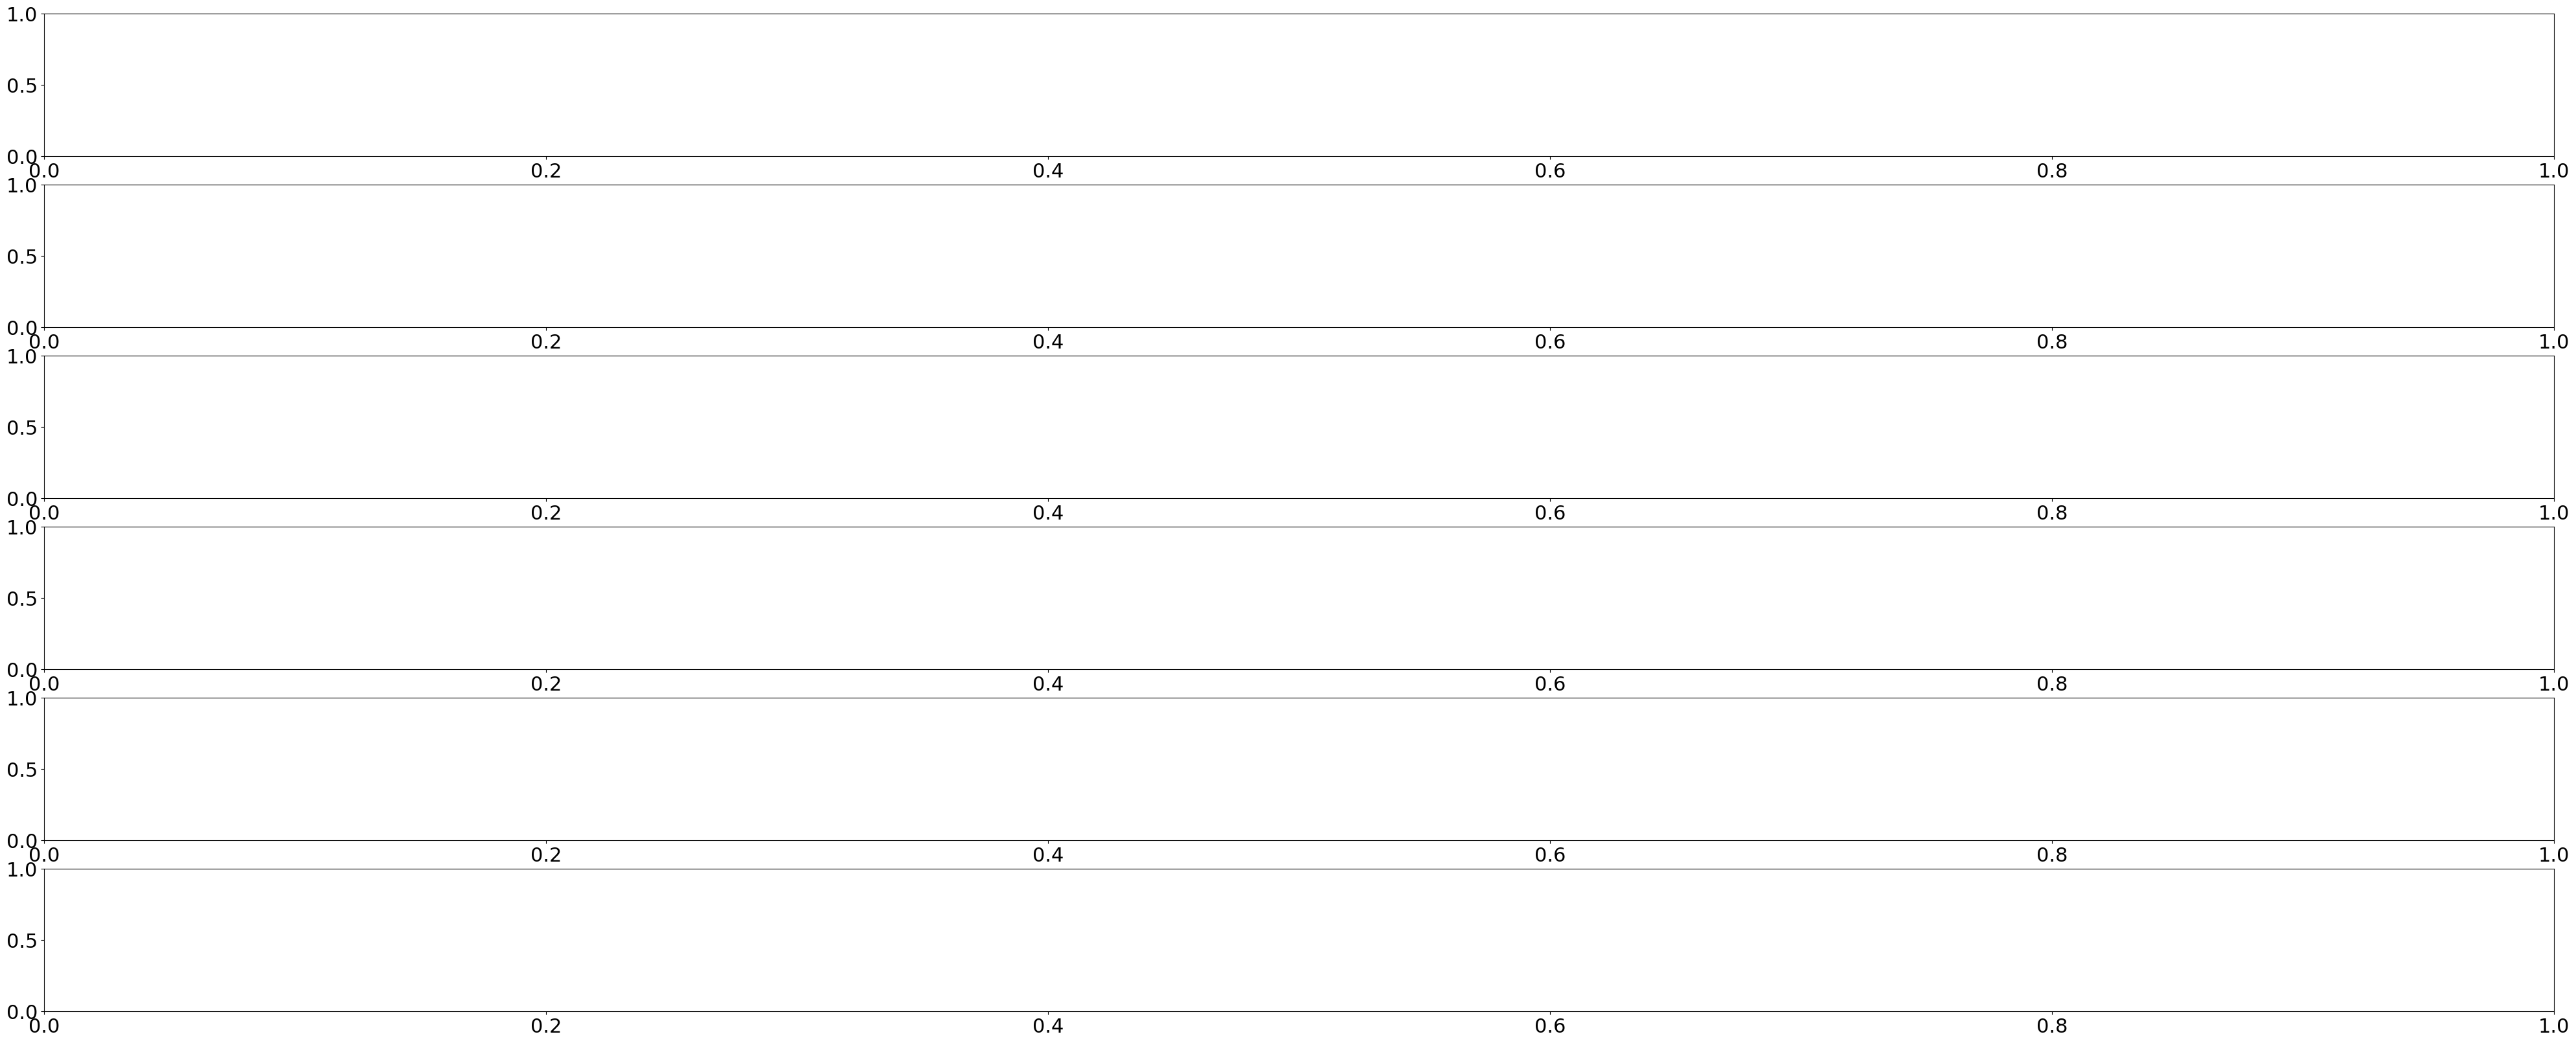

In [42]:
fig = plt.figure(figsize=(50,20))
ax = fig.subplots(nrows=6, ncols=1)

s = slice(1000,2000)

ax[0].plot(X_train[0][s, 0])
ax[1].plot(X_train[1][s, 0])
ax[2].plot(X_train[2][s, 0])
ax[3].plot(X_train[3][s, 0])
ax[4].plot(np.sum(X_train[:,s, 0], axis=0))
ax[5].plot(ecog_train[s,0] - np.sum(X_train[:,s, 0], axis=0))

ax[0].plot(ecog_train[s, 0])
ax[1].plot(ecog_train[s, 0])
ax[2].plot(ecog_train[s, 0])
ax[3].plot(ecog_train[s, 0])
ax[4].plot(ecog_train[s, 0])
ax[5].plot(ecog_train[s, 0])

_ = fig.suptitle('Filtered data (train set)')

In [ ]:
X_train.shape

#### Reshape the ECoG signal 
1. to a shape of (samples, electrodes, frequency bands)
2. to a shape of (samples, features)

In [ ]:
X_train = np.moveaxis(X_train, 0, -1)
X_test = np.moveaxis(X_test, 0, -1)

print(X_train.shape)
print(X_test.shape)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print(X_train.shape)
print(X_test.shape)

#### Compute the ECoG power of each feature
effectively computing it for each frequency band of each electrode

In [ ]:
# make a copy to avoid recomputing everything everytime

X_train_save = np.array(X_train)
X_test_save = np.array(X_test)

In [ ]:
FRAME_LENGTH = 200 # length of the ECoG window on which we compute the signal's power 
HOP = 40 # we downsample the signal to 25Hz, the original frame rate of the glove
BUFFERS = 4 # for each timestep t we concatenate features from timestep t to t-BUFFERS+1 included

X_train = tp.buffering_power(X_train, FRAME_LENGTH, HOP, BUFFERS)
X_test = tp.buffering_power(X_test, FRAME_LENGTH, HOP, BUFFERS)


In [ ]:
# Resample Y to the same frame rate as X: 25 Hz

from scipy.signal import decimate # downsample signals with antialiasing

Y_train = decimate(Y_train, HOP, axis=0, zero_phase=True)
Y_test = decimate(Y_test, HOP, axis=0, zero_phase=True)


In [ ]:
print(X_train.shape)
print(Y_train.shape)

## 1.2 Linear Regression


#### Normalization
We compute mean and standard deviation of train tests and use it to z-score both the train and test set. <br>

\begin{align}
zscore(x) = \frac{x-mean(x)}{std(x)}
\end{align}

In [43]:
# using the sklearn implementation

ecog_scaler = StandardScaler()
X_train = ecog_scaler.fit_transform(X_train)
X_test = ecog_scaler.transform(X_test)

finger_scaler = StandardScaler()
Y_train = finger_scaler.fit_transform(Y_train)
Y_test = finger_scaler.transform(Y_test)

NameError: name 'X_train' is not defined

In [44]:
from sklearn.linear_model import LinearRegression 

In [45]:
# quick lag test
for l in range(-4,5):
    Y_train_lag = tp.lag(Y_train, l)
    Y_test_lag = tp.lag(Y_test, l)
    
    reg = LinearRegression()
    reg.fit(X_train, Y_train_lag)
    print(l)
    print(reg.score(X_train, Y_train_lag))
    print(reg.score(X_test, Y_test_lag))
    print()

NameError: name 'Y_train' is not defined

#### Built-in score evaluation

The built-in [score()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge.score) function of sckiti-learn models returns the coefficient of determination of the prediction.

The coefficient of determination $R^2$ is defined as:

\begin{align}
R^2 = (1 - \frac{u}{v})
\end{align}

where $u$ is the residual sum of squares `((y_true - y_pred)** 2).sum()` <br>
and $v$ is the total sum of squares `((y_true - y_true.mean()) ** 2).sum()`

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). <br>
A constant model that always predicts the expected value of $y$, disregarding the input features, would get
a $R^2$ score of 0.0.

In [46]:
# settle with 0 lag

for finger in range(Y_train.shape[1]):
    reg = LinearRegression()
    reg.fit(X_train, Y_train[:,finger])
    print(f'Finger {finger}:')
    print(f'\t train: {reg.score(X_train, Y_train[:,finger])}')
    print(f'\t test:  {reg.score(X_test, Y_test[:,finger])}')


NameError: name 'Y_train' is not defined

In [47]:
# Plot predictions (blue) and ground truth (orange)

reg = LinearRegression()
reg.fit(X_train, Y_train)

fig = plt.figure(figsize=(90,50))
ax = fig.subplots(nrows=10, ncols=1)

Y_train_predict = reg.predict(X_train)
Y_test_predict = reg.predict(X_test)

for finger in range(5):
    ax[2*finger].plot(Y_train_predict[:,finger])
    ax[2*finger].plot(Y_train[:,finger])
    ax[2*finger].set_ylabel(f'finger {finger+1} (train)')
    
    ax[2*finger+1].plot(Y_test_predict[:,finger])
    ax[2*finger+1].plot(Y_test[:,finger])
    ax[2*finger+1].set_ylabel(f'finger {finger+1} (test)')


NameError: name 'X_train' is not defined

#### Decoding speed

In [48]:
def derivative(X):
    """ derivative by computing difference between samples n+1 and sample n-1 """
    return (tp.lag(X,1) - tp.lag(X,-1)) / 2

Y_train_speed = derivative(Y_train)
Y_test_speed = derivative(Y_test)


fig = plt.figure(figsize=(200,10))
ax = fig.subplots(nrows=1, ncols=1)

# ax.plot(Y_train)
_ = ax.plot(Y_train_speed)


NameError: name 'Y_train' is not defined

In [49]:
for finger in range(Y_train.shape[1]):
    reg = LinearRegression()
    reg.fit(X_train, Y_train_speed[:,finger])
    print(f'Finger {finger}:')
    print(f'\t train: {reg.score(X_train, Y_train_speed[:,finger])}')
    print(f'\t test:  {reg.score(X_test, Y_test_speed[:,finger])}')

NameError: name 'Y_train' is not defined

In [50]:
reg = LinearRegression()
reg.fit(X_train, Y_train_speed)

fig = plt.figure(figsize=(90,50))
ax = fig.subplots(nrows=10, ncols=1)

Y_train_predict = reg.predict(X_train)
Y_test_predict = reg.predict(X_test)

for finger in range(5):
    ax[2*finger].plot(Y_train_predict[:,finger])
    ax[2*finger].plot(Y_train[:,finger])
    ax[2*finger].set_ylabel(f'finger {finger+1} (train)')
    
    ax[2*finger+1].plot(Y_test_predict[:,finger])
    ax[2*finger+1].plot(Y_test[:,finger])
    ax[2*finger+1].set_ylabel(f'finger {finger+1} (test)')

NameError: name 'X_train' is not defined

#### Ridge Regression

In [51]:
from sklearn.linear_model import Ridge 

In [52]:
finger = slice(0,5)

for i in range(10):
    alpha = i**3
    reg = Ridge(alpha=alpha)
    reg.fit(X_train, Y_train[:,finger])
    print(f'alpha={alpha}:')
    print(f'\t train: {reg.score(X_train, Y_train[:,finger])}')
    print(f'\t test:  {reg.score(X_test, Y_test[:,finger])}')

NameError: name 'X_train' is not defined

In [53]:
alpha=1.0
for alpha in 0,1,100,1000:
    print(f'alpha={alpha}')
    for finger in range(Y_train.shape[1]):
        reg = Ridge(alpha=alpha)
        reg.fit(X_train, Y_train[:,finger])
        print(f'\tFinger {finger}:')
        print(f'\t\t train: {reg.score(X_train, Y_train[:,finger])}')
        print(f'\t\t test:  {reg.score(X_test, Y_test[:,finger])}')


alpha=0


NameError: name 'Y_train' is not defined

In [54]:
best_alpha = np.array([1000,1000,1000,1000,1000]) # Pick the best alpha for each finger

reg = Ridge(alpha=best_alpha)
reg.fit(X_train, Y_train)

fig = plt.figure(figsize=(90,50))
ax = fig.subplots(nrows=10, ncols=1)

Y_train_predict = reg.predict(X_train)
Y_test_predict = reg.predict(X_test)

for finger in range(5):
    ax[2*finger].plot(Y_train_predict[:,finger])
    ax[2*finger].plot(Y_train[:,finger])
    ax[2*finger].set_ylabel(f'finger {finger+1} (train)')
    
    ax[2*finger+1].plot(Y_test_predict[:,finger])
    ax[2*finger+1].plot(Y_test[:,finger])
    ax[2*finger+1].set_ylabel(f'finger {finger+1} (test)')

NameError: name 'X_train' is not defined

## 1.3 Metrics for continuous decoding

### Mean Squared Error

In [55]:
for finger in range(5):
    rmse_train = mean_squared_error(Y_train[:,finger], Y_train_predict[:,finger])
    print("Finger {} train MSE : {:.4f}".format(finger, rmse_train))
    rmse_test = mean_squared_error(Y_test[:,finger], Y_test_predict[:,finger])
    print("Finger {} test MSE : {:.4f}".format(finger, rmse_test))

NameError: name 'Y_train' is not defined